# Clustring

In this notebook, we will see three different types of clustering algorithms(K-means, agglomerative hierarchical, and DBSCAN) and see how each type of them deals with data.


**1) K-means**

it is the simpliest clustring algorithm having an iterative process in which the dataset are grouped into k number of predefined non-overlapping clusters or subgroups, making the inner points of the cluster as similar as possible while trying to keep the clusters at distinct space it allocates the data points to a cluster so that the sum of the squared distance between the clusters centroid and the data point is at a minimum, at this position the centroid of the cluster is the arithmetic mean of the data points that are in the clusters.

<img src='images/Kmeans.gif'>

**2) agglomerative hierarchical**

it used to group objects in clusters based on their similarity. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.

<img src='images/hierarchical.gif'>

**3) DBSCAN**

it is a clustering algorithm that defines clusters as continuous regions of high density and works well if all the clusters are dense enough and well separated by low-density regions. In the case of DBSCAN, instead of guessing the number of clusters, will define two hyperparameters: epsilon and minPoints to arrive at clusters.

<img src='images/DBSCAN.gif'>

## Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

## Loading & generating datasets

here I will generate 4 different distribution of data, I will load 5 datasets as well. to compare the result of each algorithm.

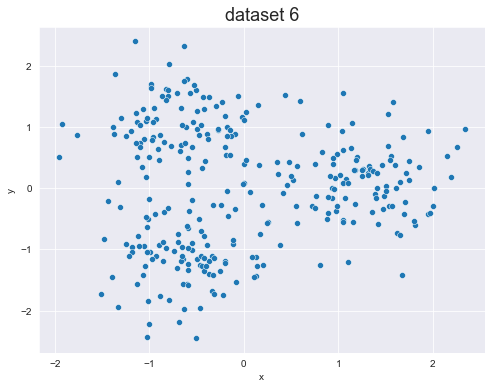

In [47]:
import sklearn.datasets
n_samples = 1500
# dataset1 (circles)
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0], columns=['x', 'y'])

# dataset2 (moons)
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0], columns=['x', 'y'])

# dataset3 (blobs)
dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0], columns=['x', 'y'])

# dataset1 (random)
dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0], columns=['x', 'y'])

dataset5= pd.read_csv("data/dataset5.csv", names=['x', 'y'])
dataset6= pd.read_csv("data/dataset6.csv", names=['x', 'y'])
dataset7= pd.read_csv("data/dataset7.csv", names=['x', 'y'])
dataset8= pd.read_csv("data/dataset8.csv", names=['x', 'y'])
dataset9= pd.read_csv("data/dataset9.csv", names=['x', 'y'])
#datasets=[dataset1]

# standard scalar object
z = StandardScaler()

dataset6[["x","y"]] = z.fit_transform(dataset6)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset6)
plt.title('dataset 6', fontsize=18)
plt.show()

1) plot all dataset <br>
2) use standard scalar<br>
3) use K-means, agglomerative, dbscan<br>
4) plot dataset after clustering<br>
5) Evaluate inertia,silhouette score,..........

In [4]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

## Apply standard scalar and ploting all dataset

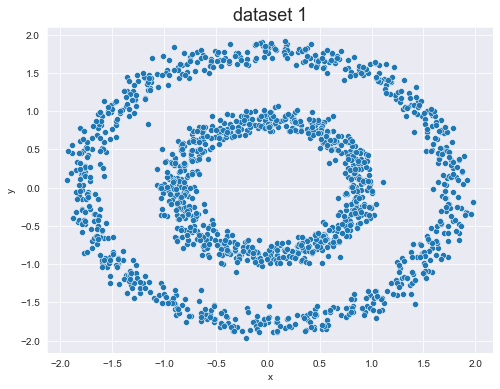

In [36]:
dataset1[['x', 'y']] = z.fit_transform(dataset1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset1)
plt.title('dataset 1', fontsize=18)
plt.show()

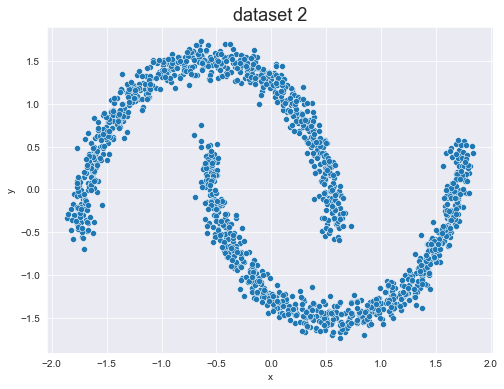

In [37]:
dataset2[['x', 'y']] = z.fit_transform(dataset2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset2)
plt.title('dataset 2', fontsize=18)
plt.show()

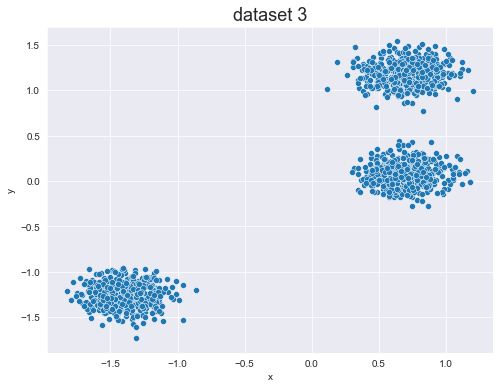

In [38]:
dataset3[['x', 'y']] = z.fit_transform(dataset3)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset3)
plt.title('dataset 3', fontsize=18)
plt.show()

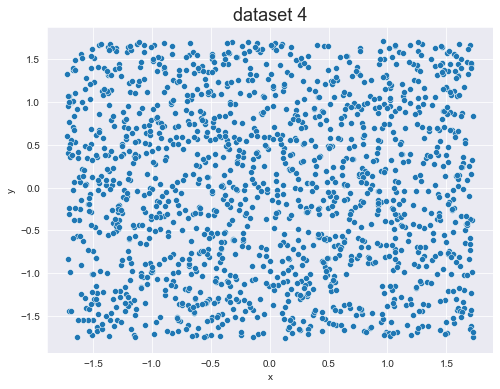

In [39]:
dataset4[['x', 'y']] = z.fit_transform(dataset4)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset4)
plt.title('dataset 4', fontsize=18)
plt.show()

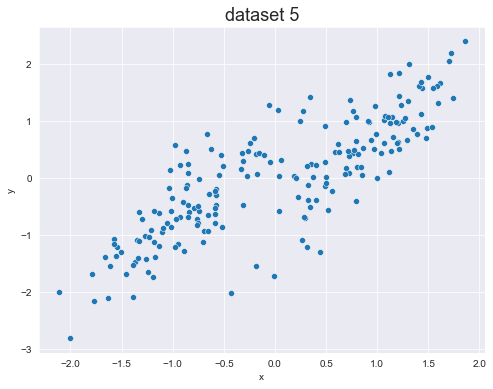

In [40]:
dataset5[["x","y"]] = z.fit_transform(dataset5)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset5)
plt.title('dataset 5', fontsize=18)
plt.show()

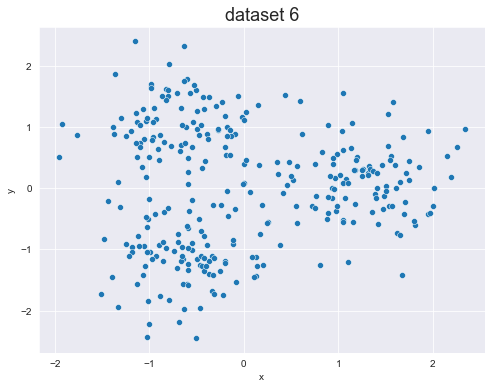

In [41]:
#dataset6[["x","y"]] = z.fit_transform(dataset6)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset6)
plt.title('dataset 6', fontsize=18)
plt.show()

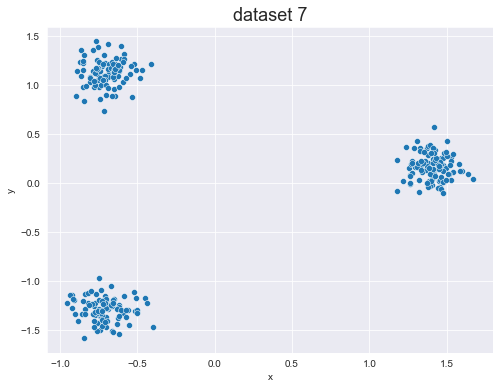

In [42]:
dataset7[["x","y"]] = z.fit_transform(dataset7)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset7)
plt.title('dataset 7', fontsize=18)
plt.show()

In [35]:
dataset8.dtypes

x    object
y    object
dtype: object

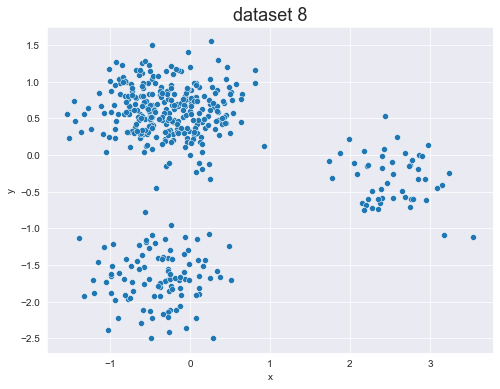

In [48]:
dataset8[["x","y"]] = z.fit_transform(dataset8)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset8)
plt.title('dataset 8', fontsize=18)
plt.show()

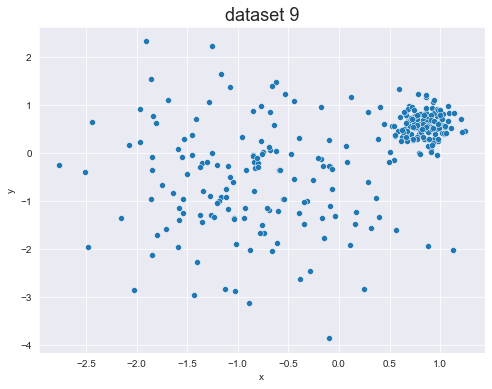

In [49]:
dataset9[["x","y"]] = z.fit_transform(dataset9)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=dataset9)
plt.title('dataset 9', fontsize=18)
plt.show()

### Applying K-means, agglomerative and dbscan  algorithms. then plot dataset after clustering

### dataset1

**1- KMeans**

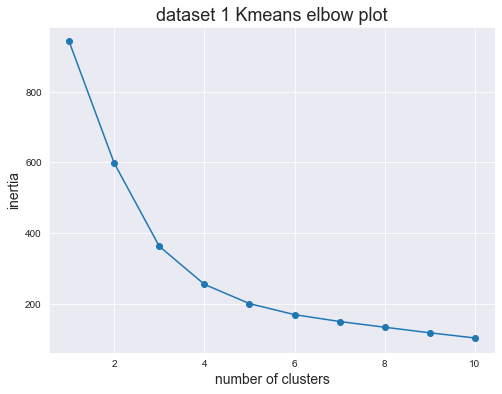

In [64]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset1)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset 1 Kmeans elbow plot', fontsize=18)
plt.show()

elbow plot is tricky here, data is two classes but elbow plot suggest 4 or 5. This is because Kmeans can not perform well with elliptical data. lets plot the clusters.

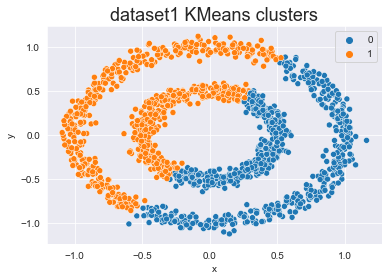

silhouette score is 0.35316623827752663


In [73]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset1)

sns.scatterplot(x='x', y='y', data=dataset1, hue=kmeans.labels_)
plt.title('dataset1 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset1, kmeans.labels_)}')

**2- Agglomerative**

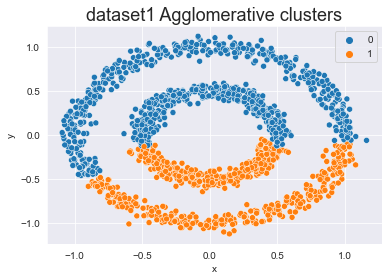

silhouette score is 0.33754418608727405


In [62]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(dataset1)

sns.scatterplot(x='x', y='y', data=dataset1, hue=ac.labels_)
plt.title('dataset1 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset1, ac.labels_)}')

**3- DBSCAN**

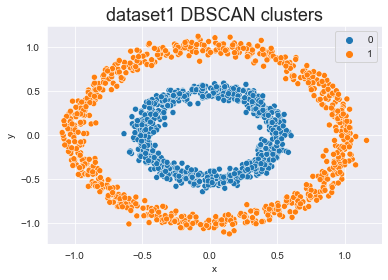

silhouette score is 0.1122854465178831


In [63]:
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(dataset1)

sns.scatterplot(x='x', y='y', data=dataset1, hue=dbscan.labels_)
plt.title('dataset1 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset1, dbscan.labels_)}')

### dataset2

**1- KMeans**

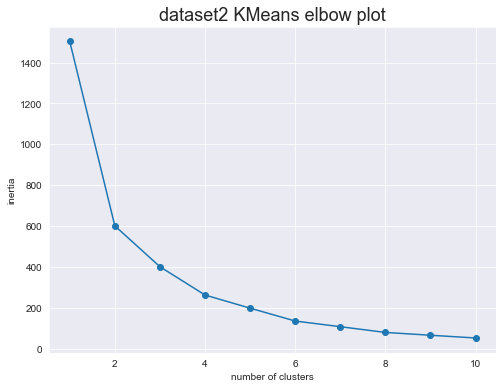

In [75]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset2)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset2 KMeans elbow plot', fontsize=18)
plt.show()

also elbow plot is not precise here, data is two classes but elbow plot suggest 4 

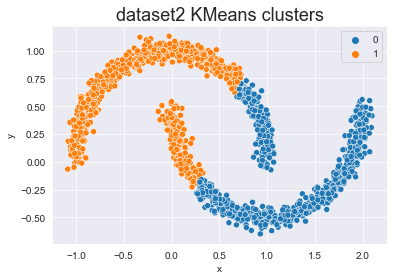

silhouette score is 0.49298355590833215


In [77]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset2)

sns.scatterplot(x='x', y='y', data=dataset2, hue=kmeans.labels_)
plt.title('dataset2 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset2, kmeans.labels_)}')

**2- Agglomerative**

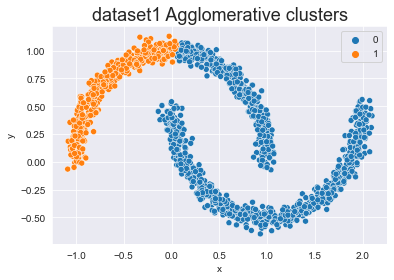

silhouette score is 0.4350540444185992


In [80]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(dataset2)
sns.scatterplot(x='x', y='y', data=dataset2, hue=ac.labels_)
plt.title('dataset1 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset2, ac.labels_)}')

**3- DBSCAN**

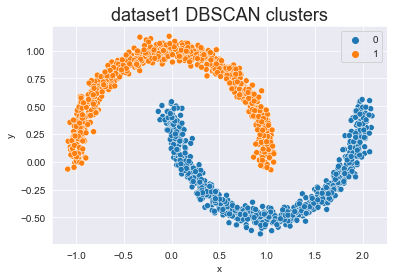

silhouette score is 0.33471316263949297


In [82]:
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(dataset2)

sns.scatterplot(x='x', y='y', data=dataset2, hue=dbscan.labels_)
plt.title('dataset1 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset2, dbscan.labels_)}')

silhouette score is tricky here, it's high in kmeans and Agglomerative Clustering than dbscan. but dbscan is better here.

**Note:** from the two datasets above we can see that DBSCAN's performance in elliptical data is better than KMeans and Agglomerative hierarchical. 

### dataset3

**1- KMeans**

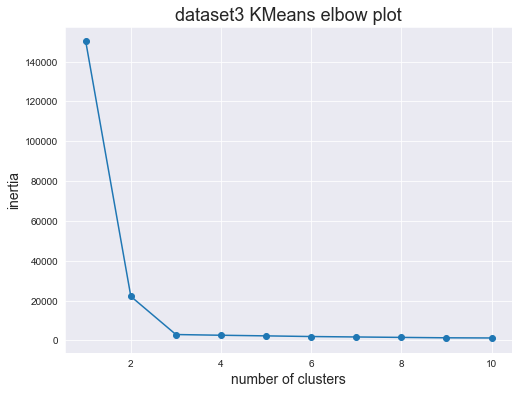

In [83]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset3)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset3 KMeans elbow plot', fontsize=18)
plt.show()

elbow plot is good here, it suggests 3 class and the data is already 3

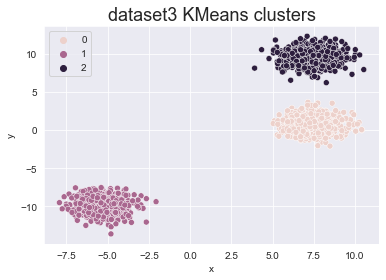

silhouette score is 0.8290743874701529


In [84]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset3)

sns.scatterplot(x='x', y='y', data=dataset3, hue=kmeans.labels_)
plt.title('dataset3 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset3, kmeans.labels_)}')

**2- Agglomerative**

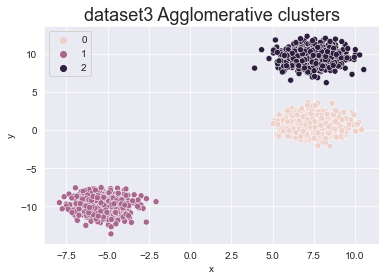

silhouette score is 0.8290743874701529


In [86]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dataset3)
sns.scatterplot(x='x', y='y', data=dataset3, hue=ac.labels_)
plt.title('dataset3 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset3, ac.labels_)}')

**3- DBSCAN**

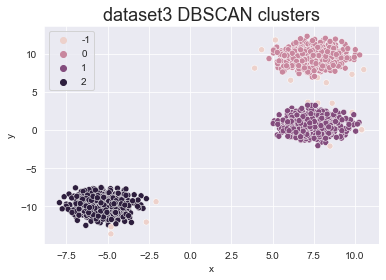

silhouette score is 0.8085231601937576


In [94]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(dataset3)

sns.scatterplot(x='x', y='y', data=dataset3, hue=dbscan.labels_)
plt.title('dataset3 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset3, dbscan.labels_)}')

### dataset4

**1- KMeans**

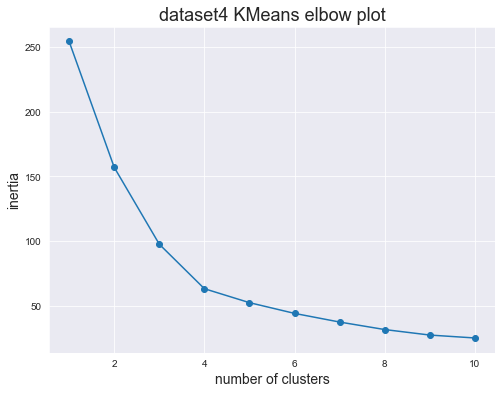

In [101]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset4)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset4 KMeans elbow plot', fontsize=18)
plt.show()

we can see from the elbow plot that 4 classes is the best choice 

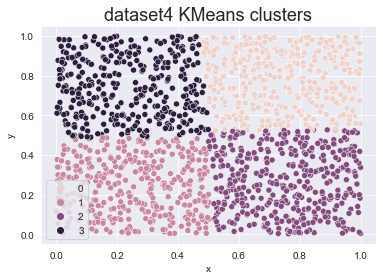

silhouette score is 0.4066595774778551


In [103]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset4)

sns.scatterplot(x='x', y='y', data=dataset4, hue=kmeans.labels_)
plt.title('dataset4 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset4, kmeans.labels_)}')

**2- Agglomerative**

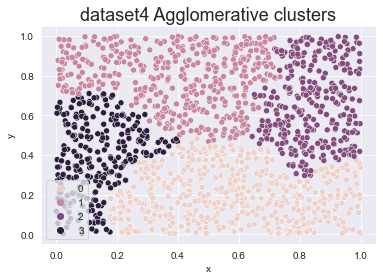

silhouette score is 0.3137038319492972


In [104]:
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(dataset4)
sns.scatterplot(x='x', y='y', data=dataset4, hue=ac.labels_)
plt.title('dataset4 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset4, ac.labels_)}')

**3- DBSCAN**

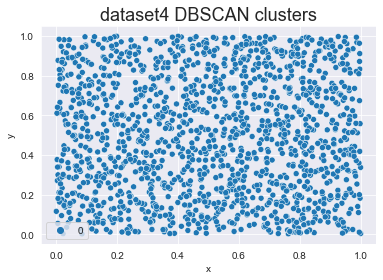

In [105]:
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(dataset4)

sns.scatterplot(x='x', y='y', data=dataset4, hue=dbscan.labels_)
plt.title('dataset4 DBSCAN clusters', fontsize=18)
plt.show()

**Note:** here DBSCAN consider all the data as one cluster because the data here is continuous region of high density.

### dataset5

**1- KMeans**

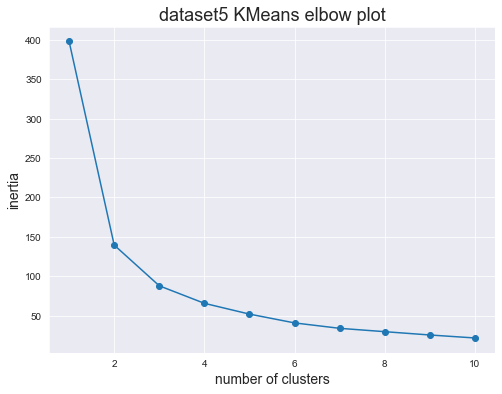

In [119]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset5)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset5 KMeans elbow plot', fontsize=18)
plt.show()

it suppose that 3 is better from the elbow plot, but I see 2 is the best

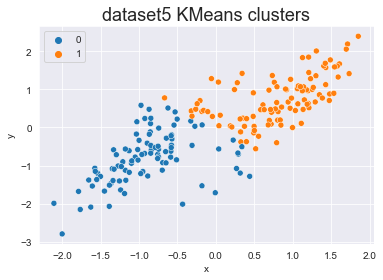

silhouette score is 0.531924793560006


In [106]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset5)

sns.scatterplot(x='x', y='y', data=dataset5, hue=kmeans.labels_)
plt.title('dataset5 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset5, kmeans.labels_)}')

**2- Agglomerative**

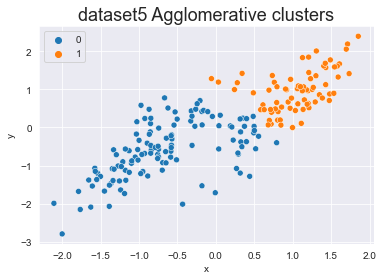

silhouette score is 0.5072921620296753


In [107]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(dataset5)
sns.scatterplot(x='x', y='y', data=dataset5, hue=ac.labels_)
plt.title('dataset5 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset5, ac.labels_)}')

**3- DBSCAN**

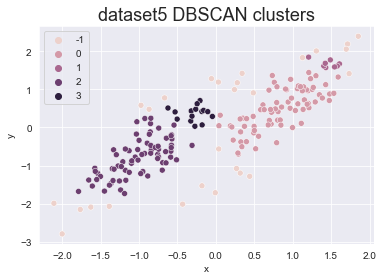

silhouette score is 0.19279970647351188


In [114]:
dbscan = DBSCAN(eps=0.33, min_samples=10)
dbscan.fit(dataset5)

sns.scatterplot(x='x', y='y', data=dataset5, hue=dbscan.labels_)
plt.title('dataset5 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset5, dbscan.labels_)}')

### dataset6

**1- Keans**

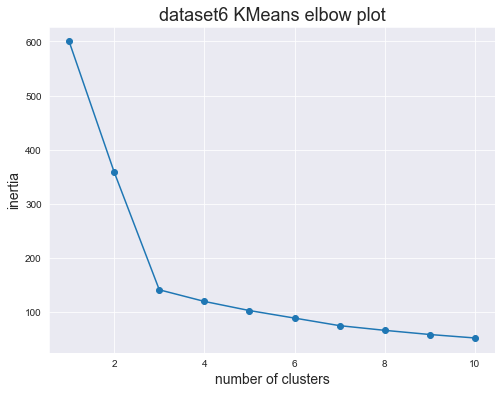

In [118]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset6)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset6 KMeans elbow plot', fontsize=18)
plt.show()

elbow plot is great here, 3 classes is good choice

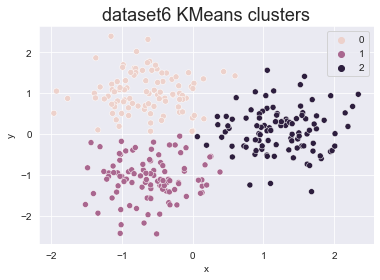

silhouette score is 0.5583157662964723


In [120]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset6)

sns.scatterplot(x='x', y='y', data=dataset6, hue=kmeans.labels_)
plt.title('dataset6 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset6, kmeans.labels_)}')

**2- Agglomerative**

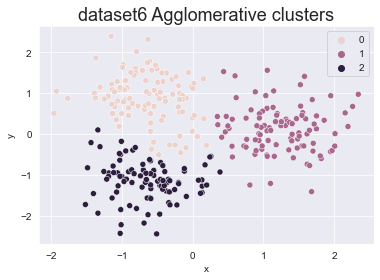

In [134]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dataset6)
sns.scatterplot(x='x', y='y', data=dataset6, hue=ac.labels_)
plt.title('dataset6 Agglomerative clusters', fontsize=18)
plt.show()

**3- DBSCAN**

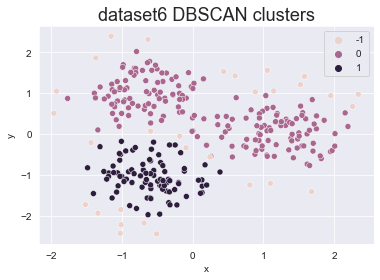

silhouette score is 0.32020219314569814


In [121]:
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan.fit(dataset6)

sns.scatterplot(x='x', y='y', data=dataset6, hue=dbscan.labels_)
plt.title('dataset6 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset6, dbscan.labels_)}')

### dataset7

**1- KMeans**

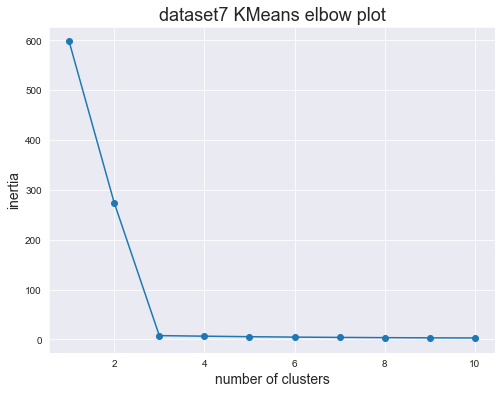

In [122]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset7)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset7 KMeans elbow plot', fontsize=18)
plt.show()

also elbow plot is very good here, the data is 3 well separated classes

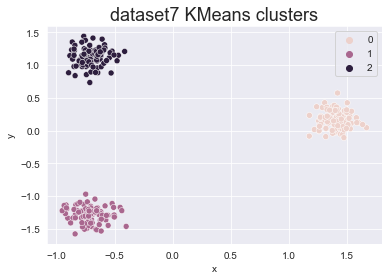

silhouette score is 0.9136190507343762


In [123]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset7)

sns.scatterplot(x='x', y='y', data=dataset7, hue=kmeans.labels_)
plt.title('dataset7 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset7, kmeans.labels_)}')

**2- Agglomerative**

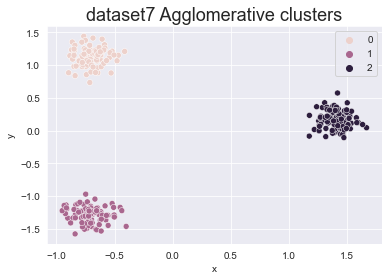

silhouette score is 0.9136190507343762


In [124]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dataset7)
sns.scatterplot(x='x', y='y', data=dataset7, hue=ac.labels_)
plt.title('dataset7 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset7, ac.labels_)}')

**3- DBSCAN**

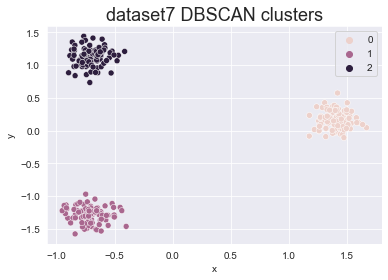

silhouette score is 0.9136190507343762


In [125]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan.fit(dataset7)

sns.scatterplot(x='x', y='y', data=dataset7, hue=dbscan.labels_)
plt.title('dataset7 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset7, dbscan.labels_)}')

### dataset8

**1- Kmeans**

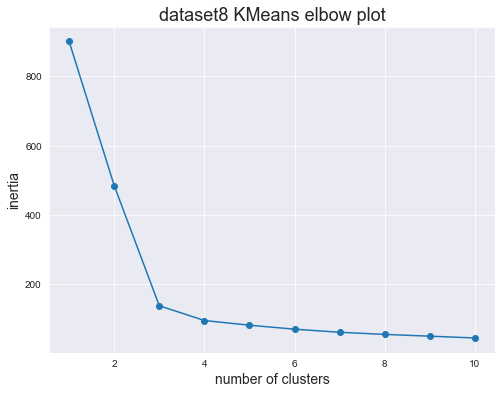

In [126]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset8)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset8 KMeans elbow plot', fontsize=18)
plt.show()

elbow plot is right here too

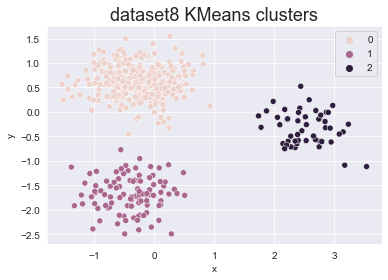

silhouette score is 0.7043537508067815


In [127]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset8)

sns.scatterplot(x='x', y='y', data=dataset8, hue=kmeans.labels_)
plt.title('dataset8 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset8, kmeans.labels_)}')

**2- Agglomerative**

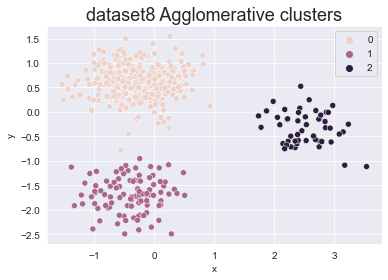

silhouette score is 0.675277707714281


In [129]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dataset8)
sns.scatterplot(x='x', y='y', data=dataset8, hue=ac.labels_)
plt.title('dataset8 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset8, dbscan.labels_)}')

**3- DBSCAN**

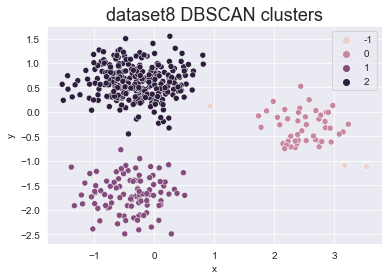

silhouette score is 0.675277707714281


In [128]:
dbscan = DBSCAN(eps=0.4, min_samples=8)
dbscan.fit(dataset8)

sns.scatterplot(x='x', y='y', data=dataset8, hue=dbscan.labels_)
plt.title('dataset8 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset8, dbscan.labels_)}')

### dataset9

**1- KMeans**

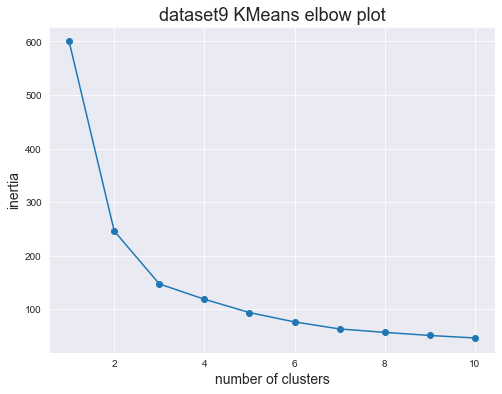

In [130]:
# Elbow plot
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset9)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('number of clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.title('dataset9 KMeans elbow plot', fontsize=18)
plt.show()

elbow plot isn't good here, from the plot the data is supposed to be 3 classes but indeed it's only two

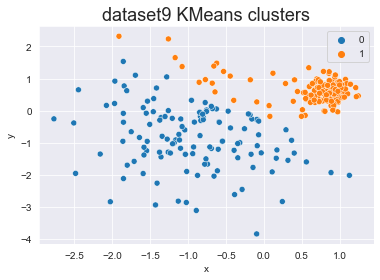

silhouette score is 0.5829742988910387


In [131]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset9)

sns.scatterplot(x='x', y='y', data=dataset9, hue=kmeans.labels_)
plt.title('dataset9 KMeans clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset9, kmeans.labels_)}')

**2- Agglomerative**

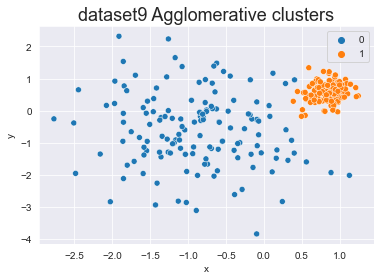

silhouette score is 0.5538801329683596


In [132]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(dataset9)
sns.scatterplot(x='x', y='y', data=dataset9, hue=ac.labels_)
plt.title('dataset9 Agglomerative clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset9, ac.labels_)}')

**3- DBSCAN**

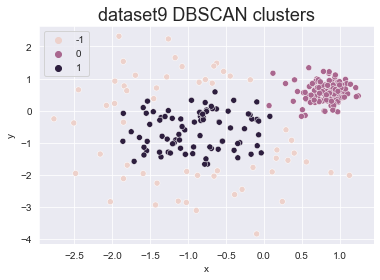

silhouette score is 0.5111118121716597


In [133]:
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan.fit(dataset9)

sns.scatterplot(x='x', y='y', data=dataset9, hue=dbscan.labels_)
plt.title('dataset9 DBSCAN clusters', fontsize=18)
plt.show()
print(f'silhouette score is {silhouette_score(dataset9, dbscan.labels_)}')

dbscan classify them into two classes and some outliers

### Conclusion
We now understand how 3 popular clustering models work as well as their implementation in python using sklearn. As shown below, each model has its own pros and cons:

<img src='images/clustering.jpg'>